In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense

In [19]:
# These are XOR inputs
x=np.array([[0,0,1,1],[0,1,0,1]])
# These are XOR outputs
y=np.array([[0,1,1,0]])
# Number of inputs
n_x = 2
# Number of neurons in output layer
n_y = 1
# Number of neurons in hidden layer
n_h = 2
# Total training examples
m = x.shape[1]
# Learning rate
lr = 0.1
# Define random seed for consistent results
np.random.seed(2)
# Define weight matrices for neural network
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
# I didnt use bias units
# We will use this list to accumulate losses
losses = []

In [20]:
# I used sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):

    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)

    dw2 = np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1

Text(0, 0.5, 'Loss value')

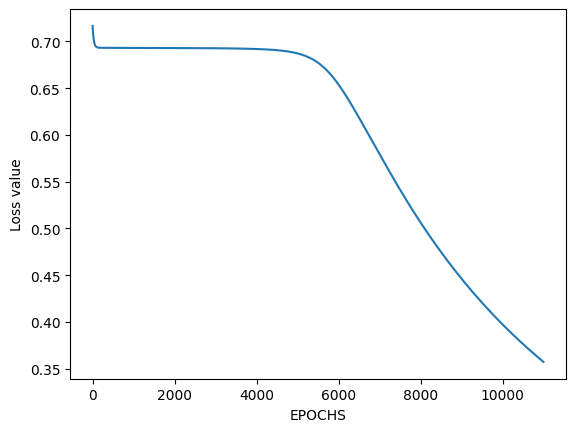

In [24]:
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [22]:
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [23]:
test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

For input [1, 0] output is 1
For input [0, 0] output is 1
For input [0, 1] output is 1
For input [1, 1] output is 1
